##### By : [Kori Isabella Hutabarat](https://www.dicoding.com/users/icaaaa)
##### Email : corryissabella@gmail.com
##### Data Source : https://www.kaggle.com/fedesoriano/heart-failure-prediction

#**Introduction** :

The topic of this project is about the classification of heart disease in humans with 12 attribute information. This project is made for Submission 1 - Machine Learning Terapan Class at Dicoding.

# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import time

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import files

# Kaggle setup

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Upload json file downloaded from kaggle account
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Create kaggle directory and move the uploaded file to new folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

# overwrite read permissions to be accessible on Google Colab
!chmod 600 /root/.kaggle/kaggle.json

# Downloading datasets and managing data

####**Dataset Information :**

Type | Information
--- | ---
Source | [Kaggle Dataset : Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
License | Database : Open Database, Contents : Original Authors
Category | Health
Usage Rating | 10.0 (Silver)
File Type and Size | CSV (36 kb)

In [ ]:
# Download datasets
!kaggle datasets download -d fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 6.87MB/s]


In [ ]:
# Extract the zip file
!unzip -q /content/heart-failure-prediction.zip -d .

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### **Attribute Information :**
> This dataset has 12 information attributes. Here's the explanation :

Attribute | Information
--- | ---
Age | Age of the patient (Years)
Sex | Sex of the patient (M: Male, F: Female)
ChestPainType | Chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
RestingBP | Resting blood pressure (mm Hg)
Cholesterol | Serum cholesterol (mm/dl)
FastingBS | Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
RestingECG | Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality , LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
MaxHR | Maximum heart rate achieved (Numeric value between 60 and 202)
ExerciseAngina | Exercise-induced angina (Y: Yes, N: No)
Oldpeak | Oldpeak = ST (Numeric value measured in depression)
ST_Slope | the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
HeartDisease | Output class (1: heart disease, 0: Normal)

In [ ]:
# check the information of the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#check null data
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
print (f' We have {heart.shape[0]} instances with the {heart.shape[1]-1} features and 1 target variable.')

 We have 918 instances with the 11 features and 1 target variable.


In [ ]:
# check the statistics description of the dataset
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Analysis

> Check the outliers in numeric features



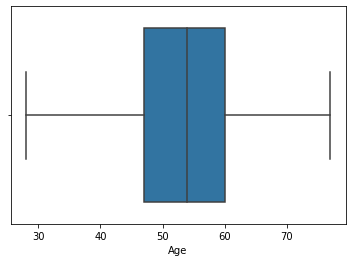

In [ ]:
sns.boxplot(x=heart['Age'])

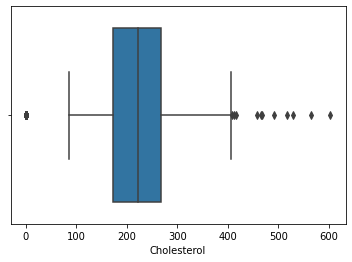

In [ ]:
sns.boxplot(x=heart['Cholesterol'])

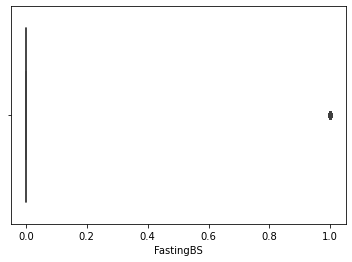

In [ ]:
sns.boxplot(x=heart['FastingBS'])

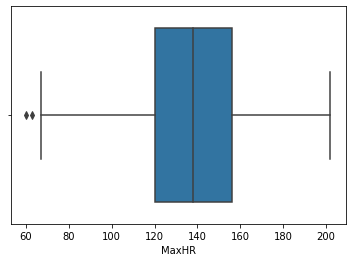

In [ ]:
sns.boxplot(x=heart['MaxHR'])

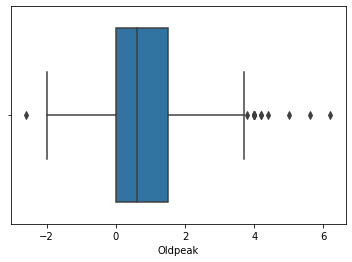

In [ ]:
sns.boxplot(x=heart['Oldpeak'])

> Check the correlation of the data with the heatmap



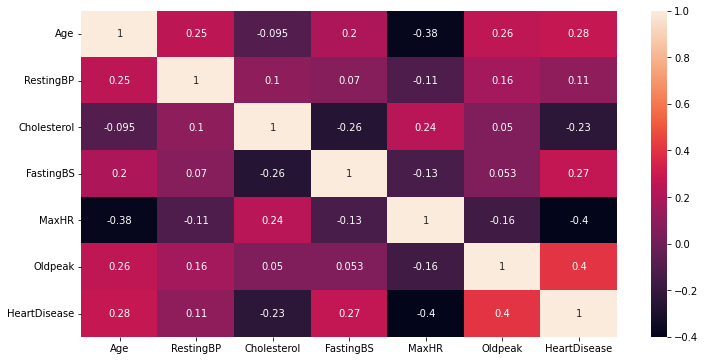

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(heart.corr(),annot=True)
plt.show()

> From the boxplot and heatmap results above, drop the rows that are in the outliers


**The equation :**
*   Lower limit = Q1 - 1.5 * IQR
*   Upper limit = Q3 + 1.5 * IQR





In [ ]:
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR =Q3-Q1
heart=heart[~((heart<(Q1-1.5*IQR))|(heart>(Q3+1.5*IQR))).any(axis=1)]

heart.shape

(588, 12)

# Univariate Analysis

In [ ]:
numerical_features = ['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

> Categorical features



   Number of samples  Percentage
M                436        74.1
F                152        25.9


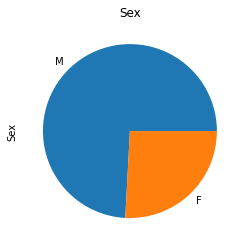

In [ ]:
# Sex column
feature = categorical_features[0]
count = heart[feature].value_counts()
percent = 100*heart[feature].value_counts(normalize=True)
df = pd.DataFrame({'Number of samples':count, 'Percentage':percent.round(1)})
print(df)
count.plot(kind='pie', title=feature);

     Number of sample  Persentage
ASY               278        47.3
ATA               144        24.5
NAP               137        23.3
TA                 29         4.9


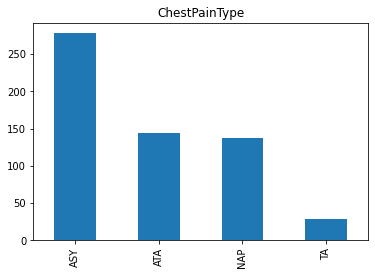

In [ ]:
# Chest pain type column
feature = categorical_features[1]
count = heart[feature].value_counts()
percent = 100*heart[feature].value_counts(normalize=True)
df = pd.DataFrame({'Number of sample':count, 'Persentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        Number of sample  Persentage
Normal               375        63.8
LVH                  131        22.3
ST                    82        13.9


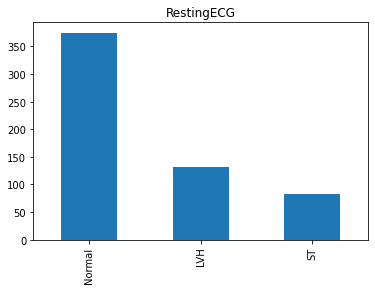

In [ ]:
# RestingECG column
feature = categorical_features[2]
count = heart[feature].value_counts()
percent = 100*heart[feature].value_counts(normalize=True)
df = pd.DataFrame({'Number of sample':count, 'Persentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   Number of sample  Persentage
N               381        64.8
Y               207        35.2


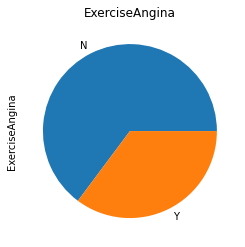

In [ ]:
# ExerciseAngina column
feature = categorical_features[3]
count = heart[feature].value_counts()
percent = 100*heart[feature].value_counts(normalize=True)
df = pd.DataFrame({'Number of sample':count, 'Persentage':percent.round(1)})
print(df)
count.plot(kind='pie', title=feature);

      Number of sample  Persentage
Up                 302        51.4
Flat               263        44.7
Down                23         3.9


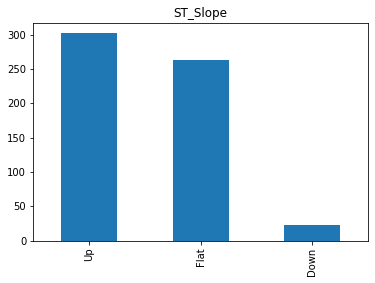

In [ ]:
# ST_Slope column
feature = categorical_features[4]
count = heart[feature].value_counts()
percent = 100*heart[feature].value_counts(normalize=True)
df = pd.DataFrame({'Number of sample':count, 'Persentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

> Numerical Features



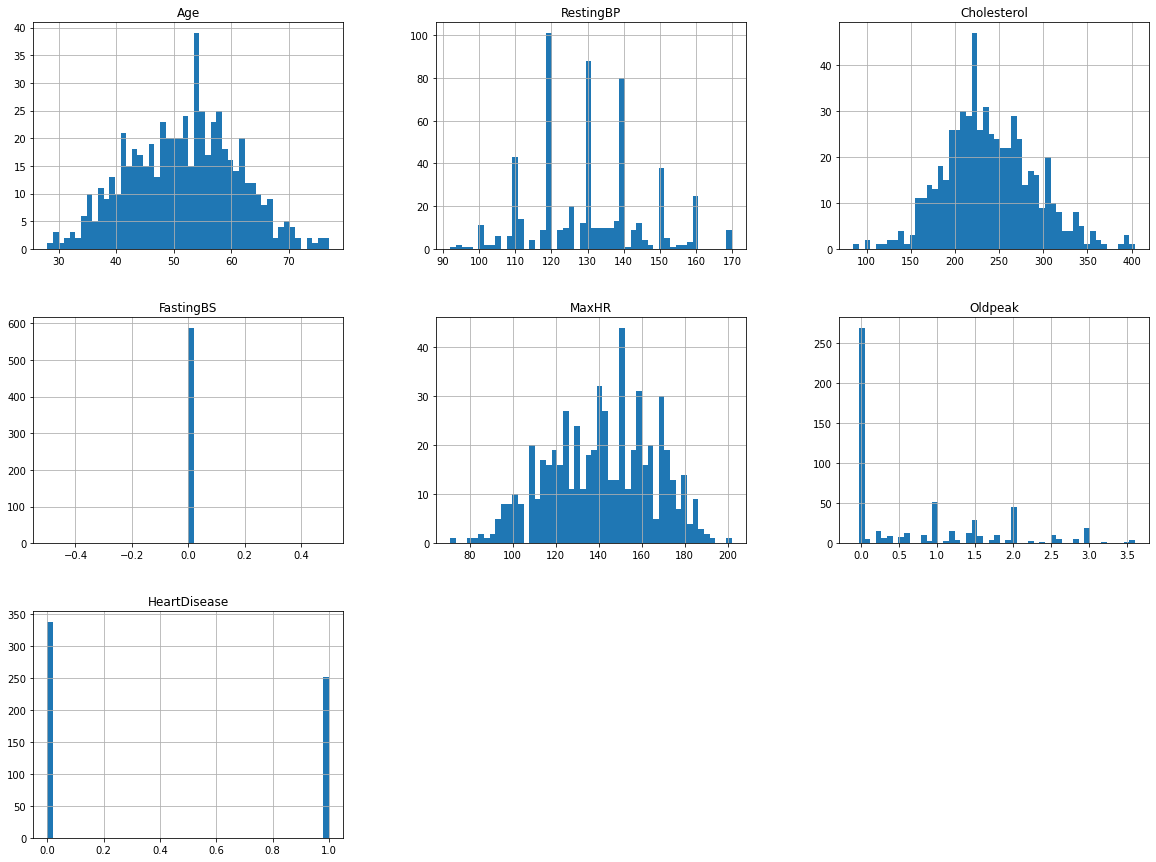

In [ ]:
heart.hist(bins=50, figsize=(20,15))
plt.show()

> Let's check the number of people with heart disease divided by gender.



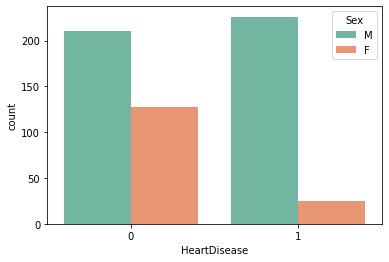

0    337
1    251
Name: HeartDisease, dtype: int64

In [ ]:
sns.countplot(x='HeartDisease', hue='Sex', data=heart, palette='Set2')
plt.show()
heart.HeartDisease.value_counts()

From the graph above, it can be concluded that there are more men with heart disease than women.

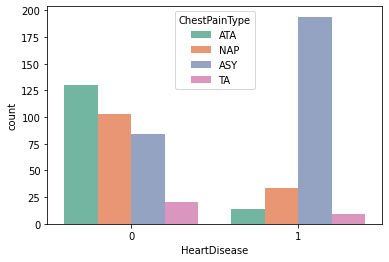

In [ ]:
sns.countplot(x='HeartDisease', hue='ChestPainType', data=heart, palette='Set2')
plt.show()

From the graph above, it can be concluded that most of those with heart disease are Asymptomatic chest pain (ASY), and without heart disease are Atypical Angina (ATA) chest pain.

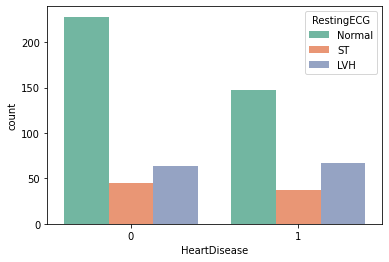

In [ ]:
sns.countplot(x='HeartDisease', hue='RestingECG', data=heart, palette='Set2')
plt.show()

The interesting thing that can be concluded from the graph above is that those with heart disease and those without heart disease are mostly Normal Resting ECG types.

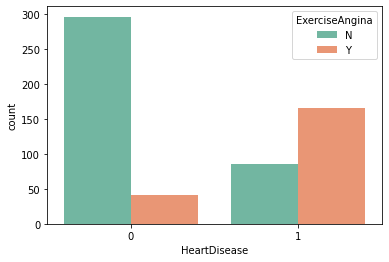

In [ ]:
sns.countplot(x='HeartDisease', hue='ExerciseAngina', data=heart, palette='Set2')
plt.show()

From the graph above it can be concluded that the majority with heart disease are those who have Exercise-Induced Angina (AP).

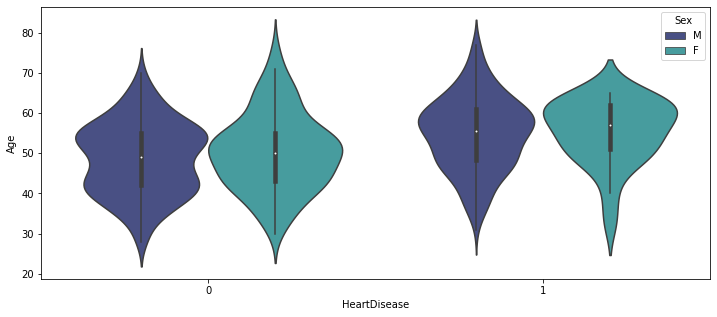

In [ ]:
plt.figure(figsize=(12,5))
sns.violinplot(x = 'HeartDisease', y='Age', hue='Sex', data = heart, palette = 'mako')
plt.show()

The graph above shows that men with heart disease are about 55-60 years old, and women 57-60 years old. Meanwhile, men without heart disease are about of 40-54 years, while women are about 50 years.

> Let's check whether this data is suitable for linear classification or not.


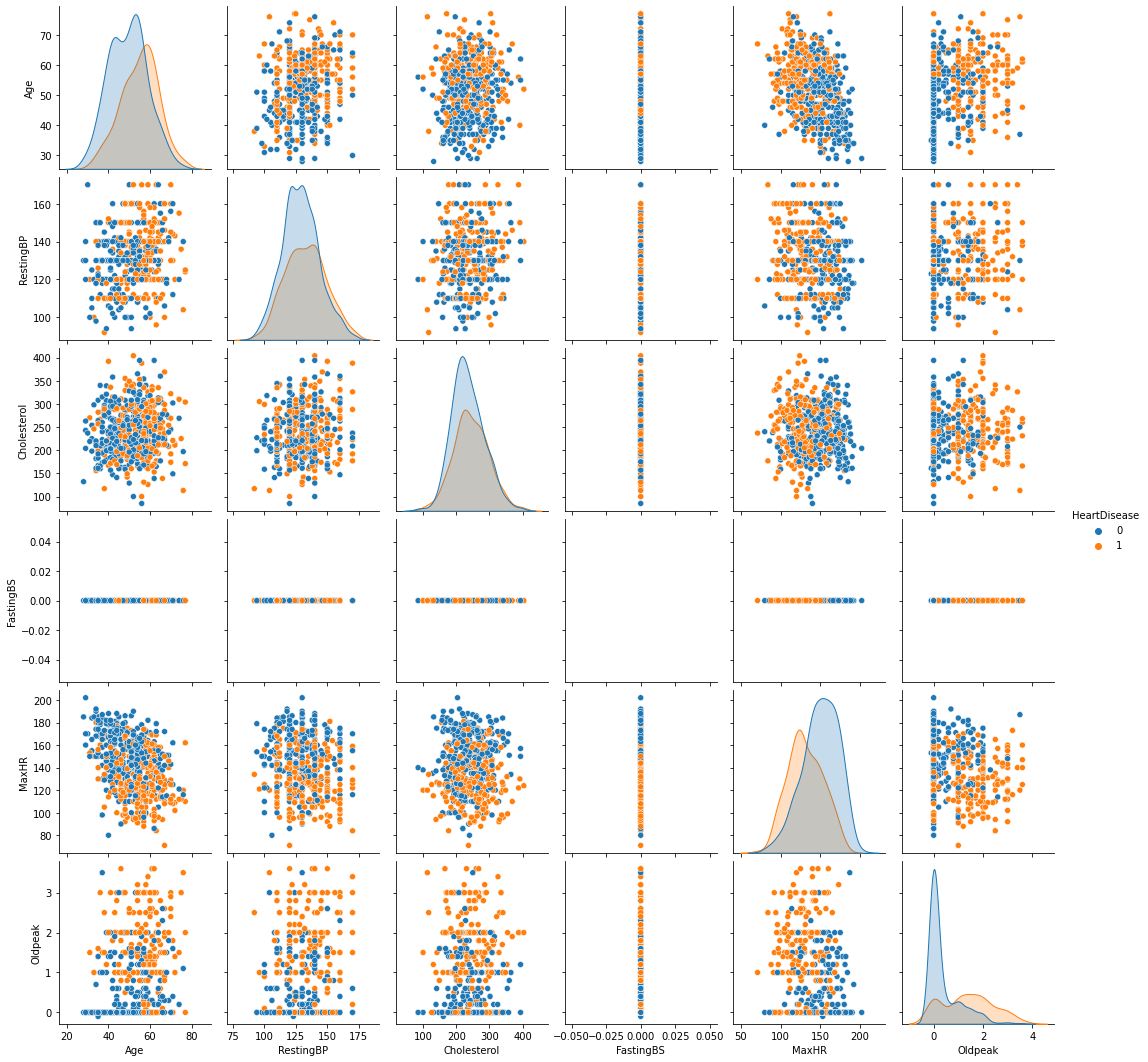

In [ ]:
sns.pairplot(heart, hue='HeartDisease', diag_kind='kde')

From this pair plot graph, it can be concluded that the data is not linear. So we will use a model that can be used for non-linear classification.

## Data Preparation

> One of the data preparation techniques for encoding category features is the one-hot-encoding technique. The function of one-hot encoding is to make the categorical data column divided into several columns according to the number of features contained in the column and convert the features of each column that have been divided into binary numbers.



In [ ]:
heart = pd.concat([heart, pd.get_dummies(heart['Sex'], prefix='Sex', drop_first=True)],axis=1)
heart = pd.concat([heart, pd.get_dummies(heart['ChestPainType'], prefix='ChestPainType', drop_first=True)],axis=1)
heart = pd.concat([heart, pd.get_dummies(heart['RestingECG'], prefix='RestingECG', drop_first=True)],axis=1)
heart = pd.concat([heart, pd.get_dummies(heart['ExerciseAngina'], prefix='ExerciseAngina', drop_first=True)],axis=1)
heart = pd.concat([heart, pd.get_dummies(heart['ST_Slope'], prefix='ST_Slope', drop_first=True)],axis=1)
heart.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,1,0,0,0,0,1,0,1,1,0
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


> Let's split the dataset into training data and test data to train the model and prove that the trained model is not overfitting. We have 588 data and we will make 20% of the total data as test data.



In [ ]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

> Standardscaler is a method used to make the dataset more acceptable to the model and produce better accuracy.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Development and Evaluation

In [ ]:
GNB = GaussianNB()
RFC = RandomForestClassifier()
XGB = XGBClassifier()
DTC = DecisionTreeClassifier()

> Let's create functions for training, prediction, and evaluation.

In this function, there is a time where the time will calculate the training time of the model. Then for metrics, there are accuracy scores, confusion metrics, and classification reports. The results of this function are the time spent during training, model accuracy, confusion metrics, and classification reports.



In [ ]:
def model_test(model):
  start = time.time()
  model.fit(X_train, y_train)
  end = time.time()
  time_spent = end-start
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  print(confusion_matrix(y_test, pred))
  print("Training time spend : {} seconds".format(round(time_spent, 3)))
  print("Accuracy            : {}".format(round(acc, 3)))
  print(classification_report(y_test, pred))

#####**Naive Bayes**

In [ ]:
print("Gaussian NB")
model_test(GNB)

Gaussian NB
[[57 11]
 [ 5 45]]
Training time spend : 0.001 seconds
Accuracy            : 0.864
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        68
           1       0.80      0.90      0.85        50

    accuracy                           0.86       118
   macro avg       0.86      0.87      0.86       118
weighted avg       0.87      0.86      0.87       118



#####**Random Forest**

In [ ]:
print("Random Forest")
model_test(RFC)

Random Forest
[[55 13]
 [ 5 45]]
Training time spend : 0.238 seconds
Accuracy            : 0.847
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        68
           1       0.78      0.90      0.83        50

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.86      0.85      0.85       118



#####**XGBoost**

In [ ]:
print("XGBoost")
model_test(XGB)

XGBoost
[[57 11]
 [ 9 41]]
Training time spend : 0.208 seconds
Accuracy            : 0.831
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        68
           1       0.79      0.82      0.80        50

    accuracy                           0.83       118
   macro avg       0.83      0.83      0.83       118
weighted avg       0.83      0.83      0.83       118



#####**Decision Tree**

In [ ]:
print("Decision Tree")
model_test(DTC)

Decision Tree
[[52 16]
 [10 40]]
Training time spend : 0.007 seconds
Accuracy            : 0.78
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        68
           1       0.71      0.80      0.75        50

    accuracy                           0.78       118
   macro avg       0.78      0.78      0.78       118
weighted avg       0.79      0.78      0.78       118



# Conclusion :

The model for classifying heart disease has been completed and this model can be used to classify the actual data. Based on this model, we can see that the algorithm with the highest accuracy is the Naive Bayes Algorithm and the lowest accuracy is the Decision Tree Algorithm. However, several other developments can still be done in order to make a model that has a higher accuracy.